In [1]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math
import pylab 
from sklearn.linear_model import  LassoLarsIC

In [2]:
#Загрузка данных
data = pd.read_csv('vladivostok.csv', sep = ',')
data

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,DATE,SEASON,SLP,WDSP,TEMP,...,STP,VISIB,MXSPD,GUST,MAX,MIN,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",3/9/2015,Весна,1013.6,27.7,19.9,...,989.5,4.3,33.0,50.5,21.7,16.5,0.12,E,999.9,1000
1,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",3/30/2015,Весна,1012.3,13.1,36.9,...,989.1,0.1,17.5,25.3,38.1,34.2,0.02,E,999.9,100000
2,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",4/7/2015,Весна,1027.2,2.9,30.0,...,3.2,17.1,7.8,999.9,34.5,27.3,0.00,I,999.9,0
3,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",5/2/2015,Весна,1009.8,7.8,47.4,...,987.1,1.6,13.6,23.3,48.9,44.8,99.99,,999.9,110000
4,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",6/16/2015,Лето,1005.8,9.2,62.8,...,983.9,9.4,9.7,999.9,77.2,53.1,0.00,I,999.9,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",12/27/2019,Зима,1025.0,13.6,2.1,...,999.6,25.6,19.4,31.1,6.3,-2.2,0.00,I,0.4,0
1601,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",12/28/2019,Зима,1028.8,9.2,10.4,...,3.8,12.4,13.6,999.9,19.0,1.9,0.00,I,0.4,0
1602,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",12/29/2019,Зима,1023.0,10.5,26.8,...,999.0,7.9,25.3,999.9,33.4,9.5,0.01,E,0.8,101000
1603,31960099999,43.116667,131.933333,183,"VLADIVOSTOK, RS",12/30/2019,Зима,1020.2,18.5,9.7,...,995.4,8.1,23.3,35.0,34.5,-2.7,0.04,E,1.6,1000


In [3]:
#Выделяем предикторы
X = data[['WDSP','DEWP','VISIB','MXSPD','PRCP']]
#Выделяем целевую переменную
y = data[['TEMP']]
#Деление на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

x = []
for i in range(len(y_test)):
    x.append(i)
    
#Создание модели линейной регрессии
reg = LinearRegression(normalize=True)
#Обучение модели линейной регрессии
reg.fit(X_train, y_train)
#Прогноз на тестовой выборке
y_pred = reg.predict(X_test)
        
params = np.append(reg.intercept_,reg.coef_)

In [4]:
#Вычисление метрик регрессии
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  18.602798586078855
Mean squared error =  1338.268728876913


In [5]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean absolute percentage error = ', mape)

Mean absolute percentage error =  TEMP    125.582151
dtype: float64


In [6]:
#Регуляризация лассо
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print(clf.coef_)

[-0.2322605   0.00140054 -0.3404633  -0.65169522 -0.05913518]


In [7]:
model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)
alpha_aic_ = model_aic.coef_
alpha_aic_

c:\users\alad_\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([-0.2404984 ,  0.00139852, -0.34194434, -0.64964959, -0.05938086])

In [8]:
y_pred_lasso = clf.predict(X_test)
y_pred_lasso_aic = model_aic.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso_aic = mean_absolute_error(y_test, y_pred_lasso_aic)
print('Mean absolute error with lasso = ', mae_lasso)
print('Mean squared error with lasso = ', mse_lasso)
print('Mean absolute error with aic lasso = ', mae_lasso_aic)

Mean absolute error with lasso =  18.607691808113035
Mean squared error with lasso =  1344.2257379372002
Mean absolute error with aic lasso =  18.602798586078883


Text(0, 0.5, 'TEMP')

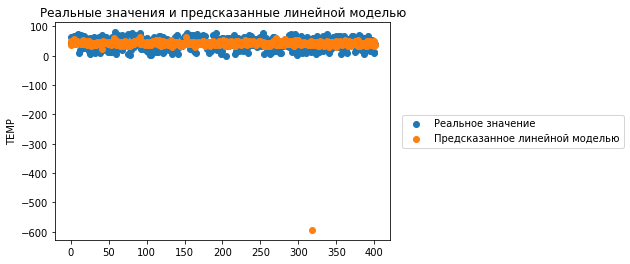

In [9]:
#График реальных и предсказанных значений
plt.scatter(x, y_test, label = u'Реальное значение')
plt.scatter(x, y_pred, label = u'Предсказанное линейной моделью')
plt.title(u'Реальные значения и предсказанные линейной моделью')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.ylabel(u'TEMP')

<AxesSubplot:>

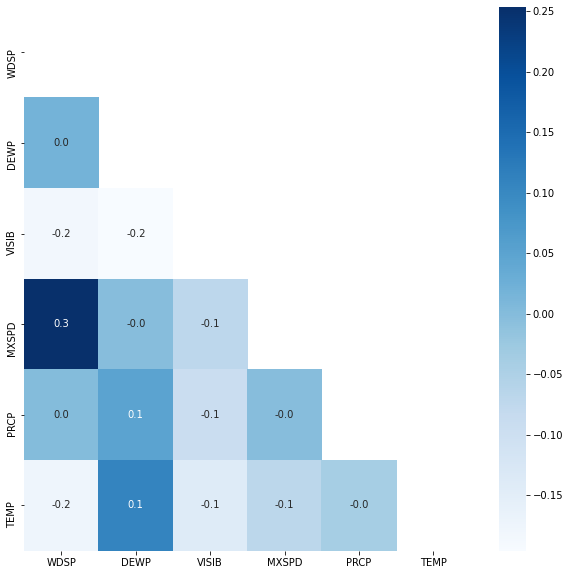

In [10]:
#Построение корреляционной матрицы признаков
dataset = data[['WDSP','DEWP','VISIB','MXSPD','PRCP', 'TEMP']]
corr = dataset.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask = mask, annot=True, fmt= '.1f', ax = ax, cmap = 'Blues')

In [38]:
#Отбор трёх самых значимых признаков
X = data[['VISIB','WDSP','DEWP']]
#Нормирование признаков
scaler = StandardScaler()
y = data[['TEMP']]
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = ['VISIB','WDSP','DEWP']
scaler = StandardScaler()
y = pd.DataFrame(scaler.fit_transform(y))
y.columns = ['TEMP']
#Деление на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#Создание и обучение модели линейной регрессии
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_all = np.array(reg.predict(X))

In [39]:
#Вычисление метрик модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  0.8251180605295542
Mean squared error =  0.9200580676849828


Text(0, 0.5, 'Предсказанные значения')

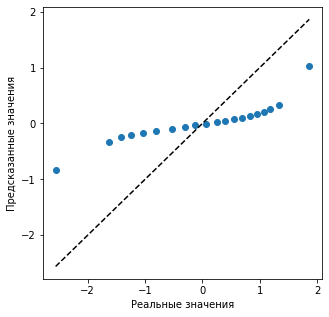

In [40]:
#Построение квантильного биплота по реальным и предсказанным значениям
percs = np.linspace(0, 100, 20)
qn_first = np.percentile(y, percs)
qn_second = np.percentile(y_pred_all, percs)
plt.figure(figsize=(5, 5))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")

plt.xlabel(u'Реальные значения')
plt.ylabel(u'Предсказанные значения')

In [41]:
#Построение и обучение полиномиальной регрессии 2-й степени
poly = PolynomialFeatures(2)
X_train_new = poly.fit_transform(X_train)
poly = PolynomialFeatures(2)
X_test_new = poly.fit_transform(X_test)
reg = LinearRegression(normalize=True)
reg.fit(X_train_new, y_train)
y_pred_poly = reg.predict(X_test_new)
X_new = poly.fit_transform(X)
y_pred_poly_all = reg.predict(X_new)

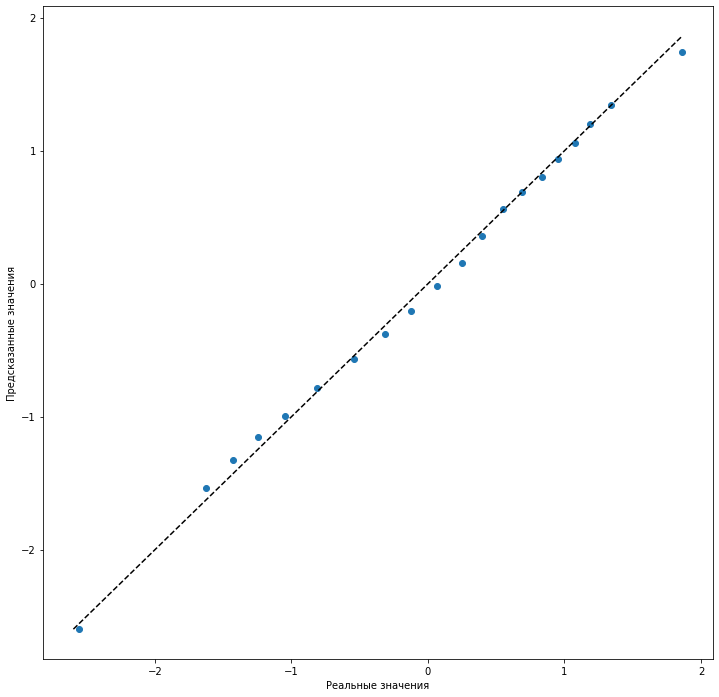

In [42]:
#Построение квантильного биплота по реальным и предсказанным значениям
percs = np.linspace(0, 100, 20)
qn_first = np.percentile(y, percs)
qn_second = np.percentile(y_pred_poly_all , percs)
plt.figure(figsize=(12, 12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")

plt.xlabel(u'Реальные значения')
plt.ylabel(u'Предсказанные значения')
plt.savefig('1')

In [43]:
#Вычисление метрик модели
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print('Mean absolute error with Polynomial model = ', mae_poly)
print('Mean squared error with Polynomial model = ', mse_poly)

Mean absolute error with Polynomial model =  0.17788071947763007
Mean squared error with Polynomial model =  0.05648405852874958


Text(0, 0.5, 'TEMP')

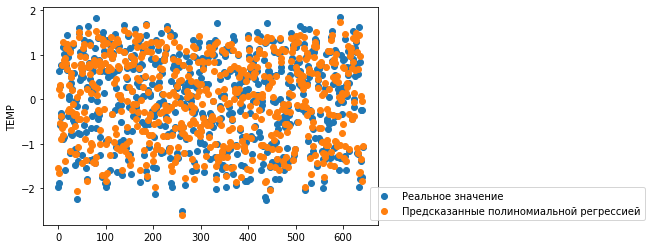

In [44]:
x = []
#Визуализация реальных и предсказанных значений
for i in range(len(y_test)):
    x.append(i)
plt.scatter(x, y_test, label = u'Реальное значение')
plt.scatter(x, y_pred_poly, label = u'Предсказанные полиномиальной регрессией')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.8, 0.1))
plt.xlabel(u'')
plt.ylabel('TEMP')


c:\users\alad_\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

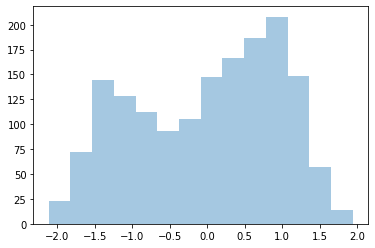

In [45]:
#Построение распределения остатков
y1 = np.array(y)
y2 = np.array(y_pred_all)
y_diff = y1[:,0] - y2[:,0]
sns.distplot(y_diff, kde=False)


In [46]:
#Confidence interval of regression coef 
import numpy as np, statsmodels.api as sm
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print (res.conf_int(0.01))  

              0         1
VISIB -0.224680 -0.052055
WDSP  -0.256075 -0.088908
DEWP  -0.005982  0.147470
